Refer the folder structure containing image data for two classes, **Cars** and **Bikes**, and are required to refer to this structure before beginning the implementation. The task involves loading all RGB images from both folders, resizing them to a fixed size, normalizing pixel values, and converting each image into a suitable input format for a deep neural network. Appropriate class labels must be assigned, and the combined dataset should be shuffled and split into training and testing sets in an 80:20 ratio. A deep neural network model must then be designed by specifying the input layer, one or more hidden layers with appropriate activation functions, and an output layer for binary classification. The model should be trained using forward propagation, backpropagation, and an optimization algorithm such as gradient descent or its variants, while monitoring the training loss. After training for a fixed number of epochs, predictions must be generated for both training and testing data to compute accuracy. Finally, the loss versus epochs graph should be plotted and the training and testing accuracy reported.


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


In [2]:
data_dir = "images"
classes = ["cars", "bikes"]


In [3]:
img_size = 64
X = []
y = []

valid_ext = (".jpg", ".jpeg", ".png", ".bmp")

for label, category in enumerate(classes):
    folder_path = os.path.join(data_dir, category)
    
    for img_name in os.listdir(folder_path):
        if not img_name.lower().endswith(valid_ext):
            continue
        
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        
        if img is None:
            continue
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (img_size, img_size))
        
        X.append(img)
        y.append(label)


In [4]:
X = np.array(X) / 255.0
y = np.array(y)

print("Total images loaded:", len(X))


Total images loaded: 785


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)


In [6]:
model = Sequential()

model.add(Flatten(input_shape=(img_size, img_size, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [8]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4920 - loss: 1.0223 - val_accuracy: 0.6051 - val_loss: 0.6686
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6274 - loss: 0.6383 - val_accuracy: 0.5924 - val_loss: 0.6532
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6385 - loss: 0.6604 - val_accuracy: 0.5096 - val_loss: 0.9696
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6115 - loss: 0.7172 - val_accuracy: 0.6178 - val_loss: 0.6855
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6417 - loss: 0.6329 - val_accuracy: 0.5159 - val_loss: 0.8034
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6608 - loss: 0.6675 - val_accuracy: 0.5987 - val_loss: 0.7003
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6943 - loss: 0.5775 - val_accuracy: 0.5796 - val_loss: 0.7782
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7245 - loss: 0.5425 - val_accuracy: 0.6561 - v

In [9]:
y_train_pred = (model.predict(X_train) > 0.5).astype(int)
y_test_pred = (model.predict(X_test) > 0.5).astype(int)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [10]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


Training Accuracy: 0.6831210191082803
Testing Accuracy: 0.5732484076433121


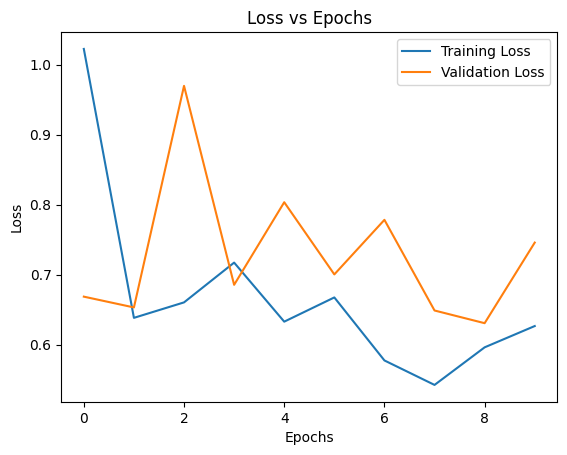

In [11]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()
